7
application of unsupervised learning
("C" exercise) Same instructions, but with an unsupervised learning, which will
most likely mean a clustering, a dimensionality reduction or a density estimation.

As in 6, it is very important to explicitely present the dataset and the problem you
work on, and ideally to discuss why solving this problem could be useful. Discuss
the important algorithmic details : for instance, if you perform a clustering, you
must discuss the metric used. Also, it is important to discuss the results obtained
(for instance by interpreting the clusters obtained in the case of a clustering). An
evaluation of the algorithm is also expected. You must choose a scoring adapted to
the problem. To summarize, the processing should be meaningful

Problem Description
Dataset:
We are using the Wine dataset from the UCI Machine Learning Repository. This dataset consists of chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. The dataset contains 13 features related to the chemical composition of the wines.

Problem:
The goal is to apply unsupervised learning techniques to discover patterns in the Wine dataset without using the labels. This could be useful for:

Understanding the natural grouping of wines based on chemical properties.
Identifying potential subgroups within the data that could correspond to different quality levels or types of wine.
Reducing the dimensionality of the data to visualize the inherent structure in a low-dimensional space.
Algorithmic Details
Techniques Used:
Clustering: Gaussian Mixture Model (GMM)
Dimensionality Reduction: t-SNE, Isomap, and Locally Linear Embedding (LLE)
Metrics and Evaluation:
Silhouette Score: To evaluate the quality of the clustering.
Visualization: To interpret the clusters and the low-dimensional embeddings.
Discussion of Metrics:
Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.
Implementation
Here is the implementation, including the code for clustering and dimensionality reduction:

python
Copier le code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
clusters = gmm.predict(X_scaled)

# Evaluate clustering with Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Add the cluster assignments to the dataframe
df = pd.DataFrame(X, columns=wine.feature_names)
df['Cluster'] = clusters

# Apply PCA for initial visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_scaled)

# Function to plot the embeddings
def plot_embedding(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

# Plot the results
plot_embedding(X_pca, y, 'PCA of Wine Data')
plot_embedding(X_tsne, y, 't-SNE of Wine Data')
plot_embedding(X_isomap, y, 'Isomap of Wine Data')
plot_embedding(X_lle, y, 'LLE of Wine Data')

# Plot the GMM clusters in PCA space
plot_embedding(X_pca, clusters, 'GMM Clusters in PCA Space')
Results and Interpretation
Silhouette Score:
The silhouette score for the GMM clustering is printed out. A higher silhouette score indicates that the clusters are well-defined.

Visualizations:
PCA: Initial visualization of the data in a 2D space. Helps to get an overview of the data distribution.
t-SNE: Captures local structure and helps in visualizing clusters that are close together in high-dimensional space.
Isomap: Preserves global geometric structure and is useful for understanding the overall data manifold.
LLE: Focuses on local linear relationships and is good for capturing the underlying structure of the data.
Clusters in PCA Space:
The clusters identified by the GMM are visualized in the PCA-reduced space, providing insight into how well the GMM has captured the natural grouping of the data.

Discussion and Evaluation
Dataset and Problem: The Wine dataset is suitable for clustering and dimensionality reduction as it has a natural grouping based on chemical properties. Solving this problem helps in understanding the inherent structure and potential subgroups in the data.
Algorithmic Details: GMM is chosen for clustering due to its flexibility in modeling clusters with different shapes and sizes. Dimensionality reduction techniques like t-SNE, Isomap, and LLE help in visualizing the data and interpreting the clusters.
Results Interpretation: The silhouette score provides a quantitative measure of clustering quality. The visualizations help in understanding the structure and distribution of the data.
Evaluation: The silhouette score and visual interpretations are used to evaluate the performance. Higher silhouette scores and well-separated clusters in visualizations indicate good performance.
This approach demonstrates the application of unsupervised learning techniques for clustering and dimensionality reduction, providing meaningful insights into the Wine dataset.

TODO reformat ça 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA

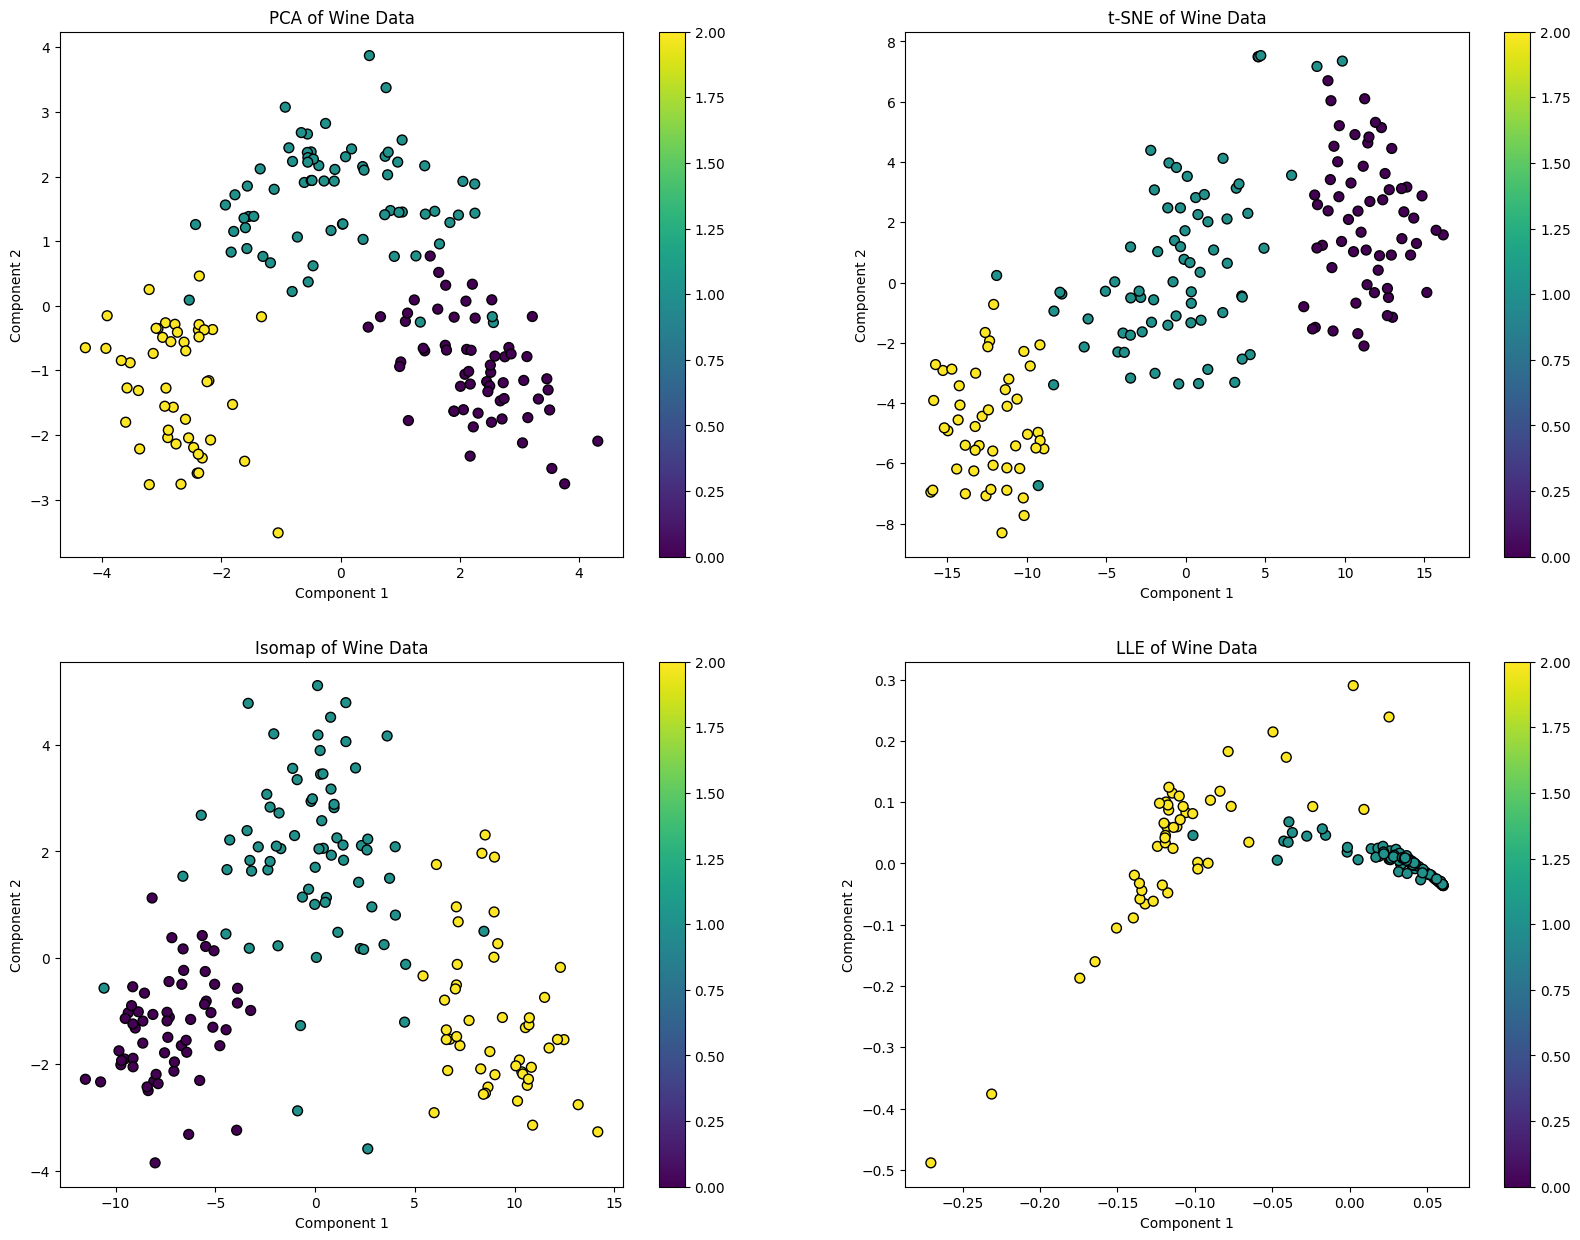

In [10]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for initial visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_scaled)

# Function to plot the embeddings
def plot_embedding(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()

# Plot the results in a grid
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plot_embedding(X_pca, y, 'PCA of Wine Data')
plt.subplot(2, 2, 2)
plot_embedding(X_tsne, y, 't-SNE of Wine Data')
plt.subplot(2, 2, 3)
plot_embedding(X_isomap, y, 'Isomap of Wine Data')
plt.subplot(2, 2, 4)
plot_embedding(X_lle, y, 'LLE of Wine Data')
plt.show()

